In [70]:
#importing packages
import pandas
from pandas import plotting
import numpy as np
from scipy import stats

In [14]:
#import data
data=pandas.read_csv ('brain_size.csv', sep=';', na_values=".")
print(data)

    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0            1  Female   133  132  124   118.0    64.5     816932
1            2    Male   140  150  124     NaN    72.5    1001121
2            3    Male   139  123  150   143.0    73.3    1038437
3            4    Male   133  129  128   172.0    68.8     965353
4            5  Female   137  132  134   147.0    65.0     951545
5            6  Female    99   90  110   146.0    69.0     928799
6            7  Female   138  136  131   138.0    64.5     991305
7            8  Female    92   90   98   175.0    66.0     854258
8            9    Male    89   93   84   134.0    66.3     904858
9           10    Male   133  114  147   172.0    68.8     955466
10          11  Female   132  129  124   118.0    64.5     833868
11          12    Male   141  150  128   151.0    70.0    1079549
12          13    Male   135  129  124   155.0    69.0     924059
13          14  Female   140  120  147   155.0    70.5     856472
14        

In [69]:
#Exercise 1
##What is the mean value for VIQ for the full population?
VIQ_mean = data["VIQ"].mean()
print(VIQ_mean)

##How many males/females were included in this study?
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.count()))
    
##What is the average value of MRI counts expressed in log units, for males and females?
for gender, value in groupby_gender['MRI_Count']:
   print((gender, value.mean()))
print(np.log(862654.6)) #female MRI log
print(np.log(954855.4)) #male MRI log

    

112.35
('Female', 20)
('Male', 20)
('Female', 862654.6)
('Male', 954855.4)
13.66776965820175
13.769315194386104


array([[<AxesSubplot:xlabel='PIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='PIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='VIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

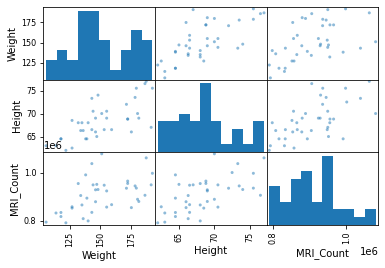

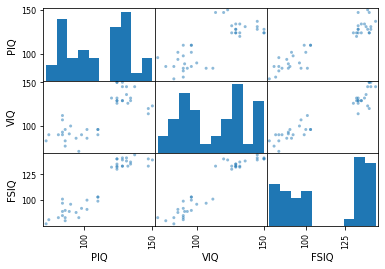

In [35]:
#making plots!
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])  
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

array([[<AxesSubplot:xlabel='PIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='PIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='VIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

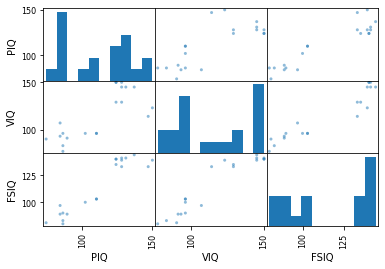

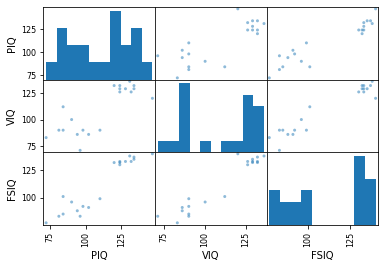

In [40]:
#Exercise 2
##Plot the scatter matrix for males only, and for females only.
##Males scatter matrix
plotting.scatter_matrix(data[data['Gender'] == 'Male'][['PIQ', 'VIQ', 'FSIQ']])
##Females scatter matrix
plotting.scatter_matrix(data[data['Gender'] == 'Female'][['PIQ', 'VIQ', 'FSIQ']])
##Do you think that the 2 sub-populations correspond to gender?
### No, we see similar patterns of distribution across both genders.

In [74]:
#1 sample t-test
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [73]:
#2 sample t-test
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)  

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)